# Automated Detection of Cybersecurity Threats using Machine Learning

The project aims to build a machine-learning model that can automatically detect
cybersecurity threats in network traffic. The project involves collecting and exploring a
dataset of network traffic, pre-processing the data, training a machine learning model using
decision trees, random forests and xgboost and evaluating the model
in the field of cybersecurity.

In [348]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import time
import random
import requests
from imblearn.over_sampling import RandomOverSampler


In [350]:

# Read the dataset into a Pandas DataFrame
df = pd.read_csv("C:/Users/MERVIN PC/Desktop/ML Project/Portmap.csv")

Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.


In [351]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,18:17.0,114456999,45,...,28337.11229,98168,3,9529897.25,351582.6313,10001143,9048097,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,18:18.5,114347504,56,...,121314.91190,420255,4,9493929.75,351541.0795,9978130,8820294,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,18:18.6,36435473,6,...,0.00000,62416,62416,36373056.00,0.0000,36373056,36373056,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,18:18.6,36434705,6,...,0.00000,62413,62413,36372291.00,0.0000,36372291,36372291,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,18:18.6,36434626,6,...,0.00000,62409,62409,36372216.00,0.0000,36372216,36372216,0,0,BENIGN


# Data Preprocessing

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191694 entries, 0 to 191693
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    191694 non-null  int64  
 1   Flow ID                       191694 non-null  object 
 2    Source IP                    191694 non-null  object 
 3    Source Port                  191694 non-null  int64  
 4    Destination IP               191694 non-null  object 
 5    Destination Port             191694 non-null  int64  
 6    Protocol                     191694 non-null  int64  
 7    Timestamp                    191694 non-null  object 
 8    Flow Duration                191694 non-null  int64  
 9    Total Fwd Packets            191694 non-null  int64  
 10   Total Backward Packets       191694 non-null  int64  
 11  Total Length of Fwd Packets   191694 non-null  int64  
 12   Total Length of Bwd Packets  191694 non-nul

In [353]:
#Shape of the Dataset
df.shape


(191694, 88)

In [354]:

# Drop Unnamed:0
df=df.drop(['Unnamed: 0'], axis = 1)
     

In [355]:
#Detecting null values" 
data_real = df.replace(np.inf, np.nan)
data_real.isnull().sum().sum()
df = data_real.dropna(axis=0)
df.isnull().sum().sum()

0

In [356]:
#missing values
df.isnull().sum().sort_values()

Flow ID                  0
Fwd Avg Bytes/Bulk       0
 Fwd Header Length.1     0
 Avg Bwd Segment Size    0
 Avg Fwd Segment Size    0
                        ..
 Flow IAT Min            0
 Flow IAT Max            0
 Flow IAT Std            0
Bwd IAT Total            0
 Label                   0
Length: 87, dtype: int64

In [357]:
#duplicate values
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
191689    False
191690    False
191691    False
191692    False
191693    False
Length: 181894, dtype: bool

In [358]:
#data types
df.dtypes

Flow ID              object
 Source IP           object
 Source Port          int64
 Destination IP      object
 Destination Port     int64
                      ...  
 Idle Max             int64
 Idle Min             int64
SimillarHTTP         object
 Inbound              int64
 Label               object
Length: 87, dtype: object

In [359]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,181894.000000,181894.000000,181894.000000,1.818940e+05,181894.000000,181894.000000,181894.000000,1.818940e+05,181894.000000,181894.000000,...,1.818940e+05,1.818940e+05,1.818940e+05,1.818940e+05,1.818940e+05,1.818940e+05,1.818940e+05,1.818940e+05,1.818940e+05,181894.000000
mean,2150.024300,32131.684410,16.791433,3.614587e+05,2.284407,0.402047,471.316723,4.287644e+02,228.224702,224.320307,...,-9.903054e+06,3.294254e+03,1.806662e+03,5.795163e+03,2.142872e+03,1.242083e+05,8.133630e+03,1.324293e+05,1.170816e+05,0.976107
std,8752.319133,19336.099547,1.515866,6.115139e+06,48.056698,74.474158,702.211289,1.370922e+05,76.087791,46.004673,...,1.021086e+08,1.154185e+05,8.450333e+04,2.124488e+05,9.773593e+04,2.447227e+06,3.938484e+05,2.568410e+06,2.388710e+06,0.152716
min,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,-1.062719e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,648.000000,15345.250000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000e+00,229.000000,229.000000,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,652.000000,32199.000000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000e+00,229.000000,229.000000,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,848.000000,48938.750000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000e+00,229.000000,229.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,65528.000000,65535.000000,17.000000,1.199474e+08,20444.000000,31700.000000,150726.000000,5.842950e+07,3583.000000,1000.000000,...,4.400000e+01,1.400653e+07,2.135244e+07,4.553668e+07,1.113396e+07,8.279180e+07,3.475561e+07,8.279180e+07,8.279180e+07,1.000000


In [360]:
pd.options.mode.use_inf_as_na = True
def missing_values_present(d):
    num = d.isnull().sum()
    den = d.count()
    return 100*(num/den)

print(missing_values_present(df).sort_values(ascending=False).head(3))

Flow ID                  0.0
 CWE Flag Count          0.0
 Fwd Avg Packets/Bulk    0.0
dtype: float64


After identifying the columns 'flow_pkts_s' and 'flow_byts_s', we treated the 'inf' constants in these columns as null values and then dropped all the null values. This resulted in the dropping of around 55,000 rows, which is less than 0.4% of the total rows.

In [361]:
#Count of each label
print("Count of each label:\n",df[' Label'].value_counts())

#Distribution in of each label in percentage
print("Distribution of each label in percentage:\n", df[' Label'].value_counts(normalize=True))

Count of each label:
 Portmap    177197
BENIGN       4697
Name:  Label, dtype: int64
Distribution of each label in percentage:
 Portmap    0.974177
BENIGN     0.025823
Name:  Label, dtype: float64


After manually inspecting the file, it was discovered that the column titles appeared multiple times as duplicates within the rows, indicating that several CSV files were merged to create one file. To address this issue, all rows that contained duplicate titles were deleted, and the title names were modified by eliminating spaces and converting them to lowercase letters to make it easier to retrieve the columns.

In [362]:
#detect null values in a dataset
data_real = df.replace(np.inf, np.nan)
data_real.isnull().sum().sum()
df = data_real.dropna(axis=0)
df.isnull().sum().sum()

0

# Data Visualization

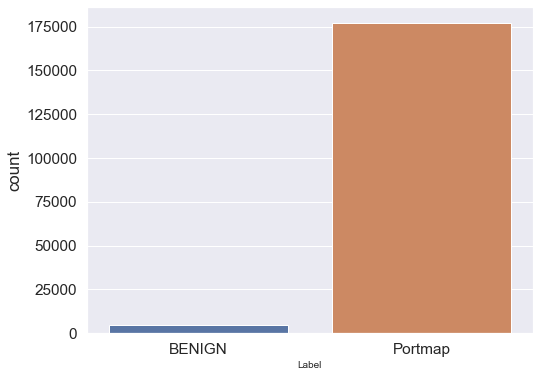

In [363]:
# Distribution of the Label column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=' Label')
plt.xlabel("Label", fontsize=10)
plt.show()

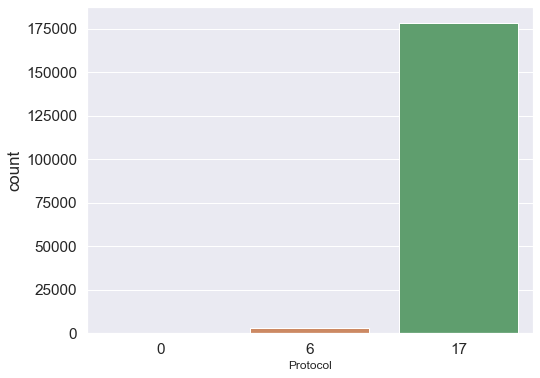

In [364]:
# Distribution of the Protocol column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=' Protocol')
plt.xlabel("Protocol", fontsize=12)
plt.show()

# Correlation of the features

<AxesSubplot:>

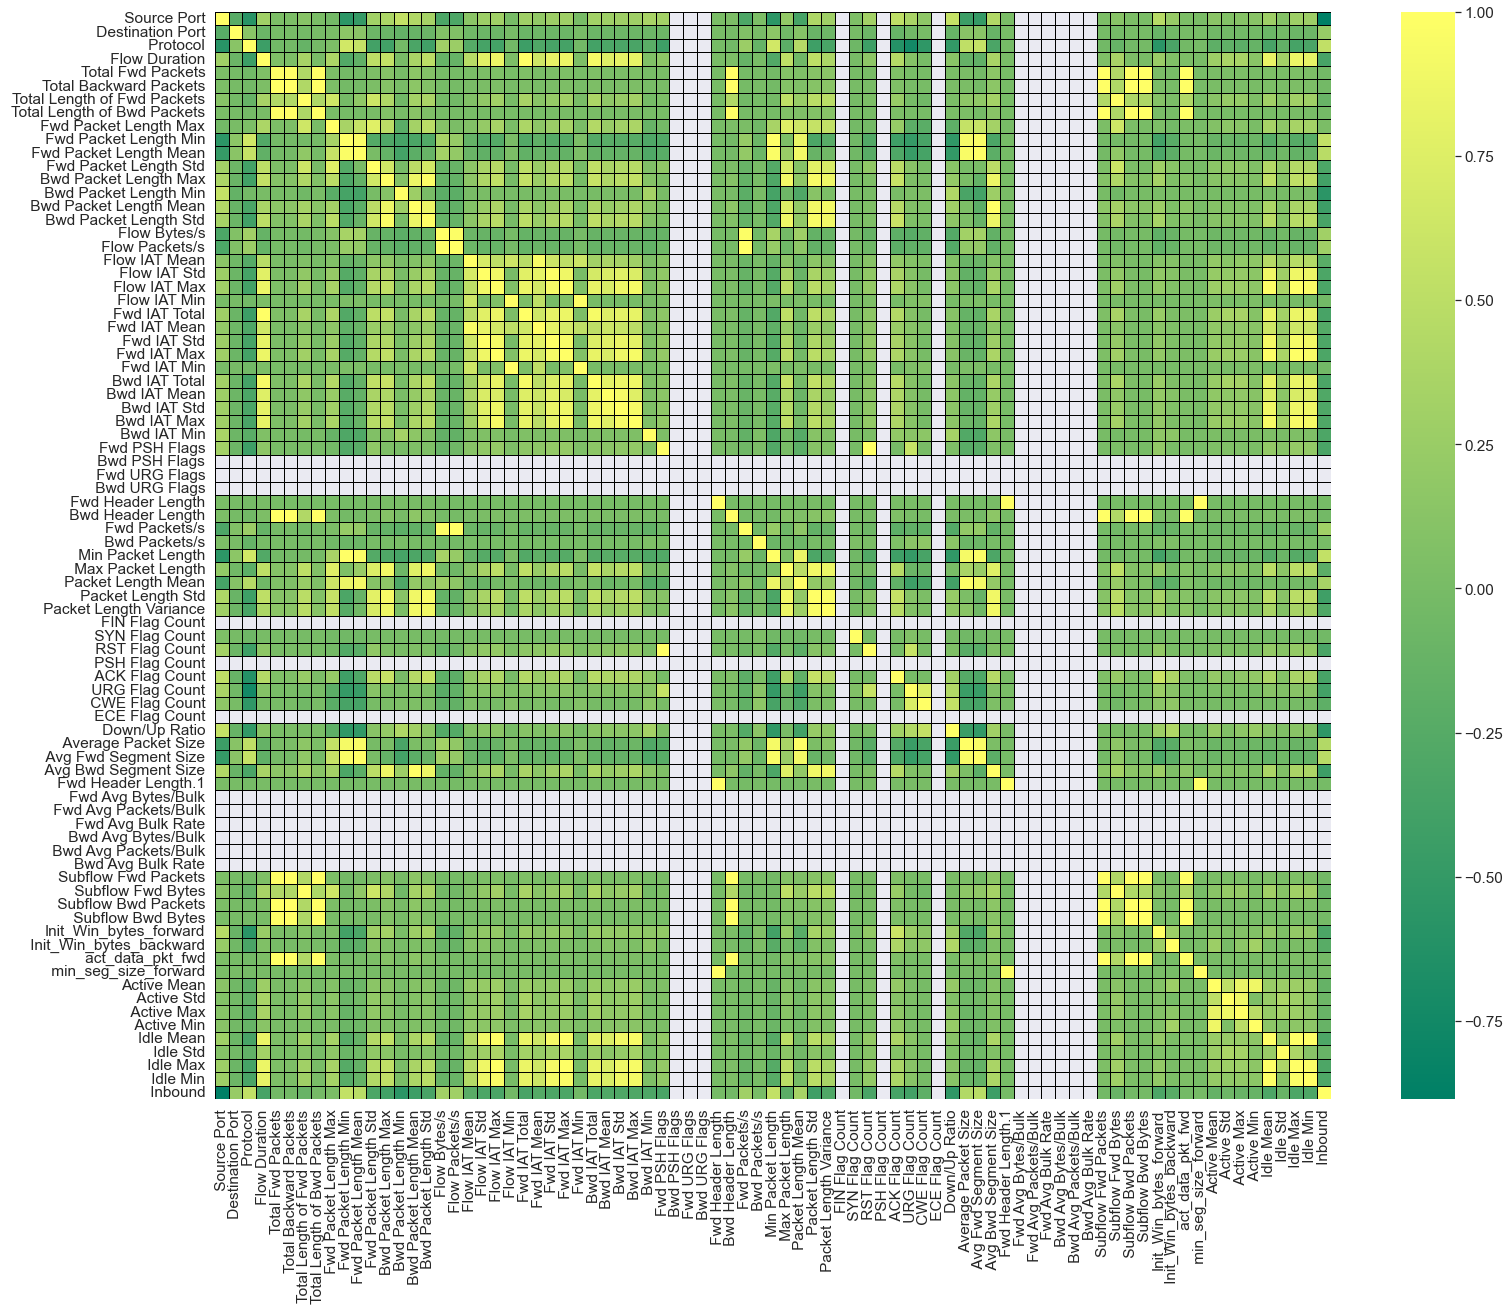

In [365]:
corr = df.drop(columns=[' Label', ' Timestamp']).corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.6, cmap= 'summer', linewidth=1, linecolor='black')

To enhance the readability, a list of the top 20 pairs of features exhibiting strong correlation has been presented in text format. This significant correlation suggests that certain columns may be eliminated in the future during the process of feature engineering.

In [366]:
def top_correlation (df,n,corr):
    corr_matrix = corr
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable1","Variable2","Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)

top_correlation(df,30, corr)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,Variable1,Variable2,Correlation
0,Total Length of Fwd Packets,Subflow Fwd Bytes,1.000000
1,Fwd Packet Length Mean,Avg Fwd Segment Size,1.000000
2,Total Length of Bwd Packets,Subflow Bwd Bytes,1.000000
3,Total Fwd Packets,Subflow Fwd Packets,1.000000
4,Total Backward Packets,Subflow Bwd Packets,1.000000
5,Fwd PSH Flags,RST Flag Count,1.000000
6,Fwd Header Length,Fwd Header Length.1,1.000000
7,Bwd Packet Length Mean,Avg Bwd Segment Size,1.000000
8,Fwd Packet Length Min,Min Packet Length,0.999958
9,Flow Packets/s,Fwd Packets/s,0.999945


Summary
The visual analysis allowed us to understand the structure and make-up of the dataset, namely:

The relationship between malicious and benign traffic is greatly skewed towards benign traffic.
The magnitude of the different attacks are small when compared to eachother. This is an indication of a potential problem when we come to train a multi-classification method to identify these attacks correctly.
There are many features strongly correlated, which signify that some of these features will be removed when executing feature selection.

# Feature Encoding

In [367]:
data_X = df.drop([' Label','SimillarHTTP'], axis = 1)

data_X.shape 

(181894, 85)

In [368]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,18:17.0,114456999,45,0,...,0,8185.583333,28337.11229,98168,3,9529897.25,351582.6313,10001143,9048097,0
1,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,18:18.5,114347504,56,0,...,0,35028.416670,121314.91190,420255,4,9493929.75,351541.0795,9978130,8820294,0
2,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,18:18.6,36435473,6,2,...,20,62416.000000,0.00000,62416,62416,36373056.00,0.0000,36373056,36373056,0
3,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,18:18.6,36434705,6,2,...,20,62413.000000,0.00000,62413,62413,36372291.00,0.0000,36372291,36372291,0
4,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,18:18.6,36434626,6,2,...,20,62409.000000,0.00000,62409,62409,36372216.00,0.0000,36372216,36372216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191689,172.16.0.5-192.168.50.4-855-47131-17,172.16.0.5,855,192.168.50.4,47131,17,01:48.9,1,2,0,...,20,0.000000,0.00000,0,0,0.00,0.0000,0,0,1
191690,172.16.0.5-192.168.50.4-856-53617-17,172.16.0.5,856,192.168.50.4,53617,17,01:48.9,1,2,0,...,20,0.000000,0.00000,0,0,0.00,0.0000,0,0,1
191691,172.16.0.5-192.168.50.4-857-9612-17,172.16.0.5,857,192.168.50.4,9612,17,01:48.9,1,2,0,...,20,0.000000,0.00000,0,0,0.00,0.0000,0,0,1
191692,172.16.0.5-192.168.50.4-858-23408-17,172.16.0.5,858,192.168.50.4,23408,17,01:48.9,49,2,0,...,20,0.000000,0.00000,0,0,0.00,0.0000,0,0,1


In [369]:
data_y = df[' Label']
data_y.shape 

(181894,)

In [370]:
#Encoding Label
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data_y_trans = le.fit_transform(data_y)

In [371]:
le_flowid = LabelEncoder()
le_flowid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_flowid.fit_transform(data_X['Flow ID'])

le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

le_SourceIP = LabelEncoder()
le_SourceIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SourceIP.fit_transform(data_X[' Source IP'])

le_DestinationIP = LabelEncoder()
le_DestinationIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DestinationIP.fit_transform(data_X[' Destination IP'])

# Feature Selection

In [372]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)  

ExtraTreesClassifier(random_state=42)

In [373]:
model.feature_importances_

array([3.69615524e-02, 1.04144077e-01, 7.31535270e-02, 6.11518666e-02,
       6.32421699e-03, 5.88173725e-02, 4.85126896e-02, 3.59082028e-03,
       4.68532415e-04, 5.56262673e-04, 7.08911113e-04, 4.33322494e-04,
       6.19660530e-03, 2.73497187e-02, 6.81152304e-03, 3.82699906e-03,
       8.05651095e-03, 1.85426486e-02, 1.21713036e-02, 2.91744566e-03,
       7.44917875e-03, 4.92862850e-03, 5.46332616e-04, 7.93236993e-03,
       2.57648057e-03, 4.97097959e-04, 6.02535259e-03, 4.49681308e-04,
       3.66885523e-04, 2.18174503e-03, 2.67114799e-04, 2.17981469e-03,
       7.26964801e-04, 2.50298372e-04, 3.04446428e-04, 9.44068615e-03,
       1.07053505e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.31662649e-04, 3.08175652e-04, 5.52100425e-03, 6.74606427e-04,
       5.82495661e-02, 1.55784184e-02, 2.31668133e-02, 6.44685599e-03,
       2.82023550e-04, 0.00000000e+00, 5.34900377e-05, 7.16965478e-03,
       0.00000000e+00, 1.40696338e-02, 4.20984925e-02, 3.02723753e-02,
      

<AxesSubplot:title={'center':'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

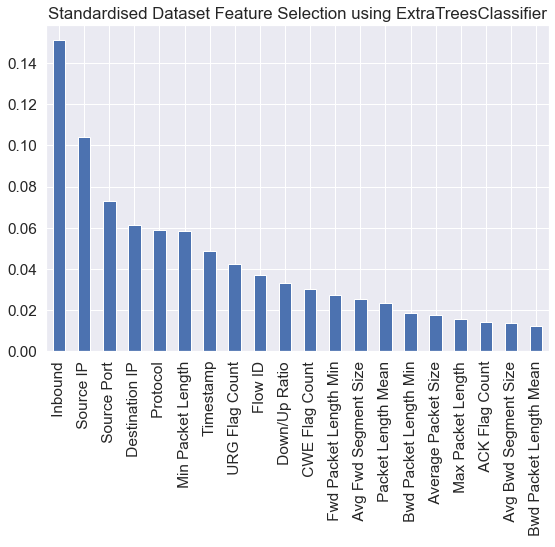

In [374]:
plt.figure(figsize=(9,6))
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [375]:
data_new_20features_X = data_X[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]

In [376]:
data_new_20features_X

,Bwd Packets/s,Total Fwd Packets,Total Length of Fwd Packets,Flow Duration,Protocol,Inbound,Min Packet Length,Fwd Packet Length Min,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Max Packet Length,Protocol,Fwd Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,act_data_pkt_fwd
0,0.000000,45,0,114456999,0,0,0,0,0.000000,0,0.00,0,0.000000,0.000000,0,0,3.931608e-01,0,0,0
1,0.000000,56,0,114347504,0,0,0,0,0.000000,0,0.00,0,0.000000,0.000000,0,0,4.897352e-01,0,0,0
2,0.054892,6,116,36435473,6,0,6,6,28.222222,46,31.75,0,19.333333,19.333333,46,6,1.646747e-01,116,116,5
3,0.054893,6,116,36434705,6,0,6,6,28.222222,46,31.75,0,19.333333,19.333333,46,6,1.646782e-01,116,116,5
4,0.054893,6,116,36434626,6,0,6,6,28.222222,46,31.75,0,19.333333,19.333333,46,6,1.646785e-01,116,116,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191689,0.000000,2,458,1,17,1,229,229,229.000000,229,343.50,0,229.000000,229.000000,229,17,2.000000e+06,458,458,1
191690,0.000000,2,458,1,17,1,229,229,229.000000,229,343.50,0,229.000000,229.000000,229,17,2.000000e+06,458,458,1
191691,0.000000,2,458,1,17,1,229,229,229.000000,229,343.50,0,229.000000,229.000000,229,17,2.000000e+06,458,458,1
191692,0.000000,2,458,49,17,1,229,229,229.000000,229,343.50,0,229.000000,229.000000,229,17,4.081633e+04,458,458,1


# Data Augmentation

In [377]:
#Checking Count of Target Column
df[' Label'].value_counts(normalize=True)

Portmap    0.974177
BENIGN     0.025823
Name:  Label, dtype: float64

To address the issue of highly imbalanced data where the Portmap class accounts for 97.5% of the data and only 2.5% of the data is for the BENIGN class, you applied sampling techniques to balance the data. You performed both undersampling and oversampling methods to determine which one is better.

However, you found that undersampling using the RandomUnderSampler class resulted in a lower amount of data. Therefore, we decided not to use this method and explore other options of Performed Oversampling using the RandomOverSampler

In [378]:
#Performed Oversampling using the RandomOverSampler class.

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [379]:
# Train Test Split Normal dataset ( All features)

In [380]:
X_train.shape 

(127325, 85)

In [381]:
X_test.shape 

(54569, 85)

In [382]:
X_train.describe

<bound method NDFrame.describe of         Flow ID   Source IP   Source Port   Destination IP   Destination Port  \
139916   143270          17           854               97              30999   
128324    43934          17           648               97              15795   
50176     88484          17           648               97              61738   
53281    145177          17           862               97              45643   
173538   163553          17           941               97              59081   
...         ...         ...           ...              ...                ...   
126164    91904          17           648               97              65296   
109285   106732          17           697               97              19575   
138735   142451          17           850               97               7987   
154340   137763          17           830               97               5302   
128338    31238          17           618               97              550

In [383]:
s = StandardScaler()
X_train_std = s.fit_transform(X_train)
X_test_std = s.fit_transform(X_test)

In [384]:
### Train Test Split 20 Feature Dataset 

from sklearn.model_selection import train_test_split
X_train_20, X_texst_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

# Feature Scaling : Standardization of the 20 Feature Dataset

In [385]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

# 1. Decision Tree Classification

In [386]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
dt = DecisionTreeClassifier()
dt.fit(X_train_std_20, y_train_20)
dt_y_pred = dt.predict(X_test_std_20)
print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(dt_y_pred)))

Classification Report for Decision Tree: 
               precision    recall  f1-score   support

      BENIGN       0.96      0.86      0.91      1375
     Portmap       1.00      1.00      1.00     53194

    accuracy                           1.00     54569
   macro avg       0.98      0.93      0.95     54569
weighted avg       1.00      1.00      1.00     54569



In [387]:
dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)

Decision Tree Confusion: 
 [[ 1181   194]
 [   45 53149]]


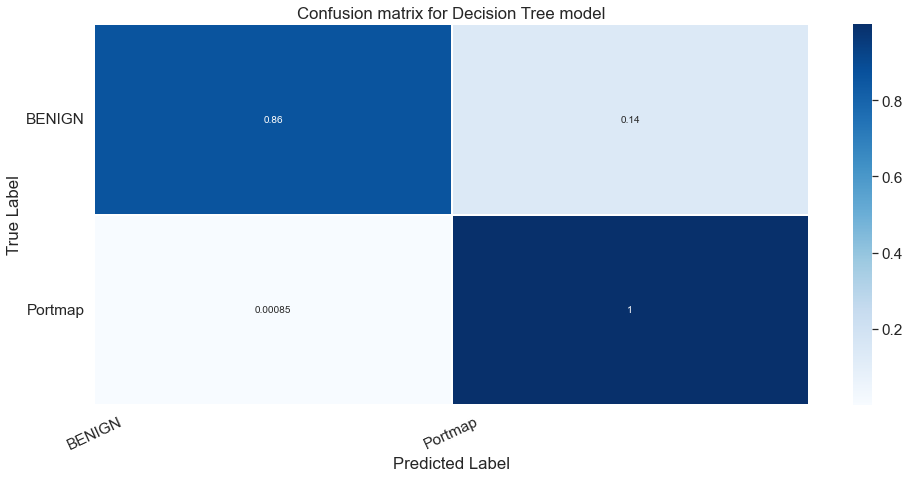

In [388]:
# Get and reshape the confusion matrix

matrix = dt_conf_mat.astype('float') / dt_conf_mat.sum(axis=1)[:, np.newaxis] 

# Build the plot
plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Blues, linewidths=0.2) 

#Add labels to the plot
class_names = ['BENIGN', 'Portmap'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 
plt.xlabel('Predicted Label') 
plt.ylabel('True Label') 
plt.title('Confusion matrix for Decision Tree model') 
plt.show()

In [389]:
#RoC curve Function 

def RoC_Curve(classifier, X_val, y_val, title): 

        lw = 2
        n_classes = 2
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN','Portmap']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


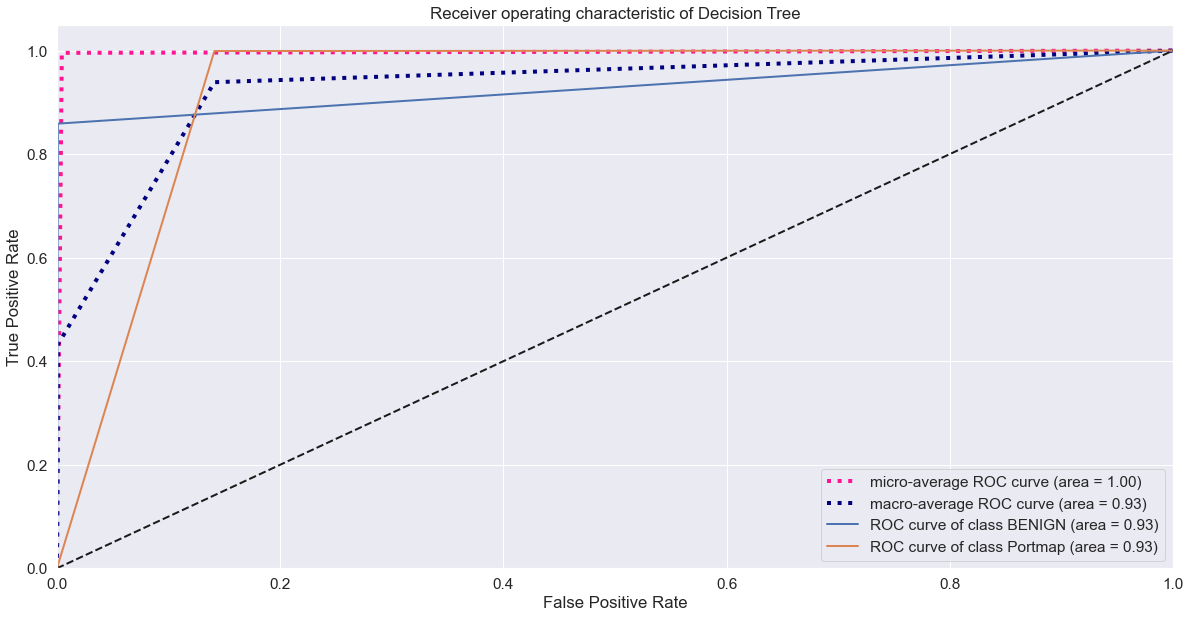

In [390]:
# RoC Curve 
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
title = 'Receiver operating characteristic of Decision Tree'
RoC_Curve(dt, X_test_std_20, y_test_20, title)

In [391]:
acc_score_dt = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

Accuracy Score for Decision Tree: 
 99.56202239366674


In [392]:
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)
rf_y_pred = rf.predict(X_test_std_20)

In [393]:
rf_y_pred

array([1, 1, 1, ..., 1, 1, 1])

# 2. Random Forest Classification

In [394]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

      BENIGN       0.96      0.99      0.98      1375
     Portmap       1.00      1.00      1.00     53194

    accuracy                           1.00     54569
   macro avg       0.98      1.00      0.99     54569
weighted avg       1.00      1.00      1.00     54569



In [395]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[ 1366     9]
 [   56 53138]]


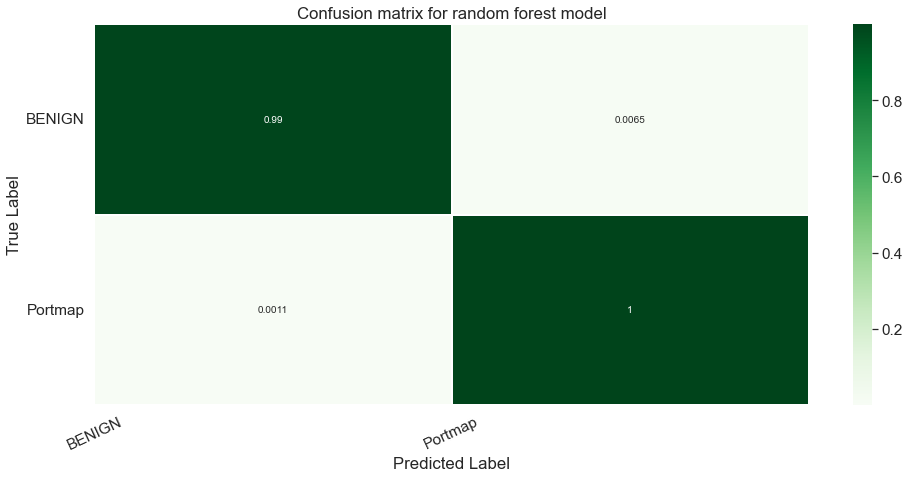

In [396]:
# Get and reshape the confusion matrix data

matrix = rf_conf_mat.astype('float') / rf_conf_mat.sum(axis=1)[:, np.newaxis] 

# Build the plot
plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Greens, linewidths=0.2) 

# add labels to the plot
class_names = ['BENIGN','Portmap'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 
plt.xlabel('Predicted Label') 
plt.ylabel('True Label') 
plt.title('Confusion matrix for random forest model') 
plt.show()

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


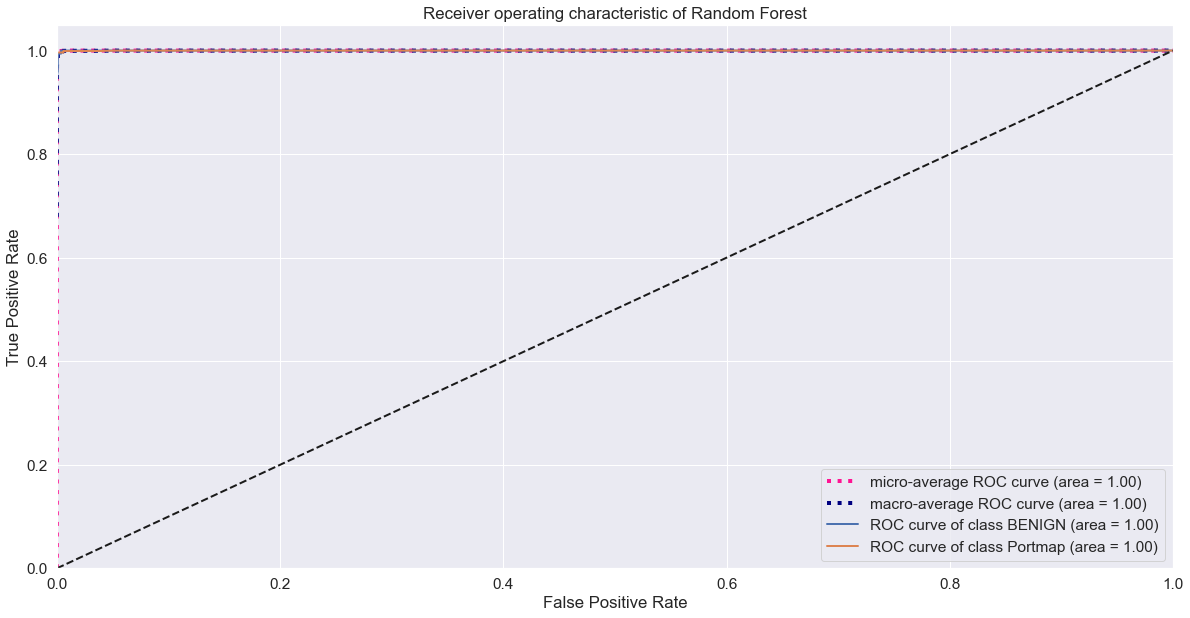

In [397]:
title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

In [398]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 99.88088475141565


# 3. XGBoost

In [399]:
#Create an instance of the XGBClassifier class and set its hyperparameters
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb.fit(X_train_std_20, y_train_20)
xgb_y_pred = xgb.predict(X_test_std_20)


In [400]:
print("Classification Report for Xgboost: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(xgb_y_pred)))

Classification Report for Xgboost: 
               precision    recall  f1-score   support

      BENIGN       0.96      0.99      0.98      1375
     Portmap       1.00      1.00      1.00     53194

    accuracy                           1.00     54569
   macro avg       0.98      1.00      0.99     54569
weighted avg       1.00      1.00      1.00     54569



XGBOOST Confusion: 
 [[ 1366     9]
 [   56 53138]]


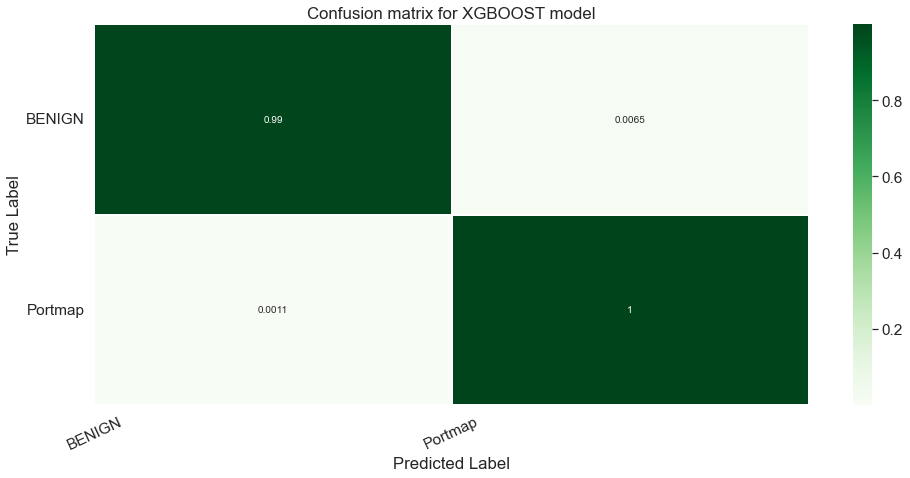

In [401]:
xgb_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("XGBOOST Confusion: \n", rf_conf_mat)

# Get and reshape the confusion matrix data

matrix = xgb_conf_mat.astype('float') / xgb_conf_mat.sum(axis=1)[:, np.newaxis] 

# Build the plot
plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Greens, linewidths=0.2) 

# add labels to the plot
class_names = ['BENIGN','Portmap'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 
plt.xlabel('Predicted Label') 
plt.ylabel('True Label') 
plt.title('Confusion matrix for XGBOOST model') 
plt.show()


In [408]:
acc_score_xgb = accuracy_score(y_test_20, xgb_y_pred)
print("Accuracy Score for XGBOOST: \n", acc_score*100)

Accuracy Score for XGBOOST: 
 99.88088475141565


# Real-Time Performance Optimization

In [403]:
#Setup XGBOOST classifier
xgb_model = XGBClassifier(objective="binary:logistic", eval_metric='logloss', verbosity=0, n_jobs=-1)

#Define hyperparameters to tune
param_grid = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': np.arange(3, 10)
}

# create an instance of the XGBClassifier
xgb_clf = xgb_model

# create a RandomizedSearchCV object with 2-fold cross validation
xgb_random = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_grid, 
                               n_iter=10, cv=2, verbose=2, random_state=42, n_jobs=-1)

# fit the RandomizedSearchCV object to the training data
start_time=time.time()
xgb_random.fit(X_train_std_20, y_train_20)
training_time=time.time() - start_time

#Make predictions on the test set and measure the inference time 
start_time = time.time()
xgb_y_pred =xgb_random.predict(X_test_std_20)
end_time = time.time() - start_time

# measure inference time
inference_time = end_time - start_time
print(f"Inference time: {inference_time:.2f} seconds")

# print the best parameters and score
print("Best parameters: ", xgb_random.best_params_)
print("Best score: ", xgb_random.best_score_)
print("Training Time: ",training_time )
print("End Time: ", end_time)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Inference time: -1681519905.52 seconds
Best parameters:  {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.1}
Best score:  0.9998036518864064
Training Time:  74.47022342681885
End Time:  0.04110836982727051


In [404]:
# use the best estimator to make predictions on the test data
y_pred = xgb_random.best_estimator_.predict(X_test_std_20)

# evaluate the model's accuracy on the test data
accuracy = accuracy_score(y_test_20, y_pred)
print("Test accuracy: {:.2f}%".format(accuracy*100))

Test accuracy: 99.93%


In [405]:
feature_names = list(df.columns)
# Add unique identifier to each feature name
unique_feature_names = [f'{name}_{i}' for i, name in enumerate(feature_names)]

# Replace feature names in data with unique names
df.columns = unique_feature_names

# Model Interpretability

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


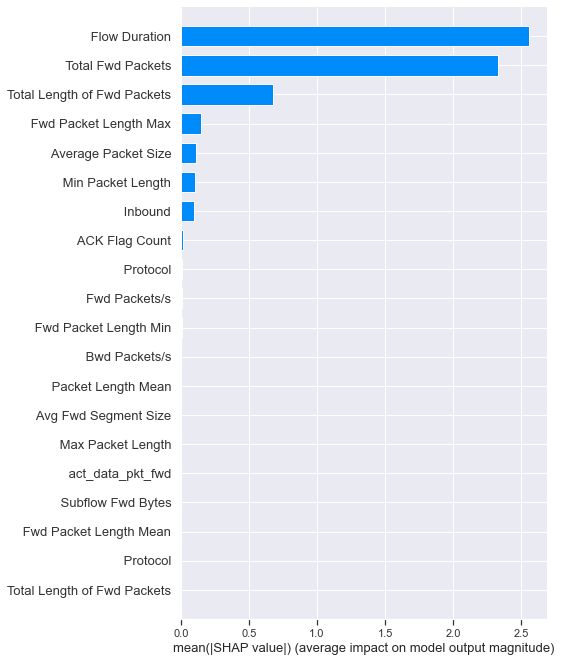

In [406]:
    # create an explainer object and generate SHAP values
    explainer = shap.TreeExplainer(xgb_random.best_estimator_)
    shap_values = explainer(X_test_20)
    # plot SHAP summary plot
    shap.summary_plot(shap_values, X_test_20,plot_type="bar")
    plt.show()


# Compare The Accuracy Scores

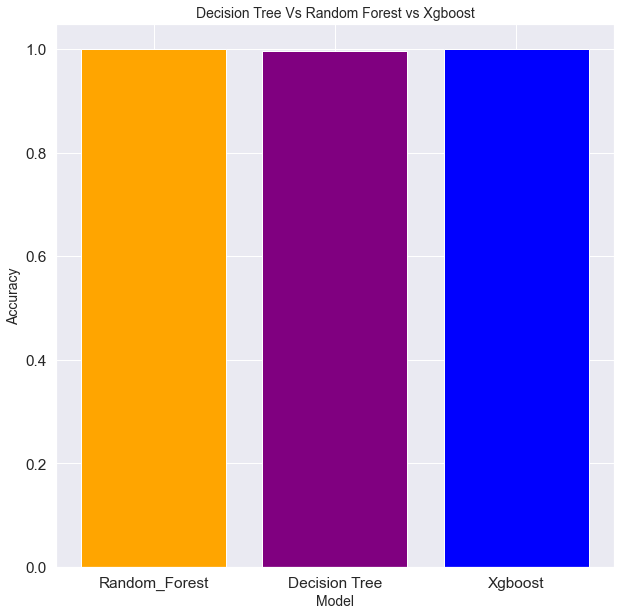

In [407]:
  
Country = ['Random_Forest','Decision Tree','Xgboost']
GDP_Per_Capita = [acc_score,acc_score_dt,acc_score_xgb]
plt.figure(figsize=(10,10))
New_Colors = ['orange','purple','Blue']
plt.bar(Country, GDP_Per_Capita, color=New_Colors)
plt.title('Decision Tree Vs Random Forest vs Xgboost', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()
     